# Reporte ejemplos chewbite web

Las señales de ejemplos corresponden a las capturadas en Michigan. De mis notebooks del desarrollo del RAFAR, confirmo que fueron usadas para train.
  
## Señales analizadas

Nombre, link y resultados

- D1Eq4Vc21036_3 (completa). Tiene pastoreo, rumia en pastura y silencio
  D1Eq4Vc21036_3.wav

- D3Eq4Vc2909_3_etiquetado (completa). Idem anterior
  D3Eq4Vc2909_3_etiquetado.wav


- D4Eq1Vc2948_002 (5550, None). Primera parte galpón y ordeño. El resto rumia en pastura y pastoreo.
  D4Eq1_Vc2948_002.wav (Terminé recortando la señal y las etiquetas)

## Algoritmos utilizados:

 - **BUFAR**: versión chewbite web
 - **RAFAR original**: corresponde a la versión publicada y la que estaba en Matlab. Se usó la traducción a python (rafar-python-original)
 - **RAFAR empiric**: Variante del original ajustada con Bloque 1 (rafar-python-empiric). Incopora varias mejoras como un pasaaltos a la entrada, buscador de pico para la regularidad y buscador de picos de energía negativos (pausas) para la clasificación.
 - **RAFAR tuned**: Variante que utiliza random forest para la regularidad y la clasificación de actividades. Ajustada con Bloque 1.

## Setup the environment

In [4]:
!pip install ../zzz_projects/armetrics -q

In [9]:
!pip install seaborn sklearn -q

In [10]:
from armetrics import utils
from armetrics import plotter

import glob
import os
import chewbite_utils

## Funciones auxiliares

In [24]:
excluded_filenames = ["D4Eq1_Vc2948_002.",
                      "D4Eq1_Vc2948_002-"]

def excluded(filename):
    check_list = [(exc_fn in filename) for exc_fn in excluded_filenames]
    return True in check_list

def get_sorted_filenames(pathsearch):
    filenames = glob.glob(pathsearch, recursive=True)
    sorted_filenames = [fn for fn in filenames if not excluded(fn)]
    sorted_filenames.sort()
    
    return sorted_filenames

## Capture data from gdrive

In [28]:
main_data_folder = "/home/sebastian/Desktop/ejemplos_chewbite_web/"

# Create list of ground files
#---------------------------------------------------------------------
pathsearch = main_data_folder + "Ground_Truth/*.txt"
ground_filenames = get_sorted_filenames(pathsearch)
#---------------------------------------------------------------------

# Create list of bufar files
#---------------------------------------------------------------------
pathsearch = main_data_folder + "BUFAR/*-activities.txt"
bufar_filenames = get_sorted_filenames(pathsearch)
#---------------------------------------------------------------------

# Create list of rafar-python-original files
#---------------------------------------------------------------------
pathsearch = main_data_folder + "RAFAR/*activities.txt" 
rafar_original_filenames = get_sorted_filenames(pathsearch)
#---------------------------------------------------------------------

# Create list of rafar-python-empiric files
#---------------------------------------------------------------------
pathsearch = main_data_folder + "RAFAR_Empiric/*activities.txt" 
rafar_empiric_filenames = get_sorted_filenames(pathsearch)
#---------------------------------------------------------------------

# Create list of rafar-python-tuned files
#---------------------------------------------------------------------
pathsearch = main_data_folder + "RAFAR_Tuned/*activities.txt" 
rafar_tuned_filenames = get_sorted_filenames(pathsearch)
#---------------------------------------------------------------------

print(len(ground_filenames),
      len(bufar_filenames),
      len(rafar_original_filenames), 
      len(rafar_empiric_filenames), 
      len(rafar_tuned_filenames))
for f1, f2 in zip(ground_filenames, rafar_tuned_filenames):
    print(os.path.basename(f1))
    print(os.path.basename(f2), "\n")

3 3 3 3 3
D1Eq4Vc21036_3.txt
D1Eq4Vc21036_3-activities.txt 

D3Eq4Vc2909_3_etiquetado.txt
D3Eq4Vc2909_3_etiquetado-activities.txt 

D4Eq1_Vc2948_002_5550.txt
D4Eq1_Vc2948_002_5550-activities.txt 



Name consistency should be checked. No automation is done.

## Segmentación


================ SEGMENTACION ================



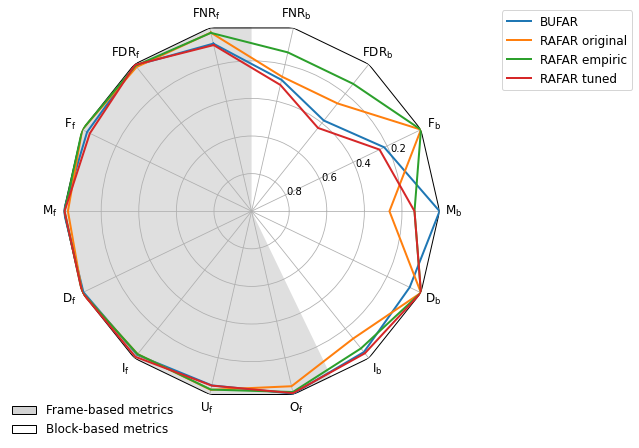

Mean duration used to normalize the violinplot top axis: 271.03 min



/home/sebastian/.virtualenvs/signals-chewbite-web/lib/python3.7/site-packages/armetrics/plotter.py:159: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["%.0f%%" % (100.0 * d / ground_mean_in_minutes) for d in ax1.get_xticks()])


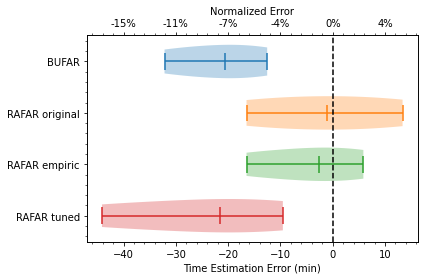

Predictor                Frame-based f1score      Block-based f1score
BUFAR                    0.952 (+-0.026)          0.658 (+-0.346)
RAFAR original           0.977 (+-0.013)          0.733 (+-0.462)
RAFAR empiric            0.981 (+-0.012)          0.867 (+-0.231)
RAFAR tuned              0.948 (+-0.038)          0.613 (+-0.368)

>>BUFAR errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-20.52 min, 	0.958
	D3Eq4Vc2909_3_etiquetado.txt	-32.17 min, 	0.923
	D4Eq1_Vc2948_002_5550.txt	-12.53 min, 	0.973

>>RAFAR original errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-16.48 min, 	0.968
	D3Eq4Vc2909_3_etiquetado.txt	13.37 min, 	0.971
	D4Eq1_Vc2948_002_5550.txt	-1.03 min, 	0.993

>>RAFAR empiric errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-16.48 min, 	0.968
	D3Eq4Vc2909_3_etiquetado.txt	5.87 min, 	0.982
	D4Eq1_Vc2948_002_5550.txt	-2.53 min, 	0.993

>>RAFAR tuned errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-21.48 min, 	0.960
	D3Eq4Vc2909_3_etiqueta

In [29]:
label_of_interest = ["SEGMENTACION"]
names_of_predictors = ["BUFAR", "RAFAR original", "RAFAR empiric", "RAFAR tuned"]
predictions_filenames = [bufar_filenames, rafar_original_filenames, rafar_empiric_filenames, rafar_tuned_filenames]
report_csv = "rafarX3_bufar_segmentation_report_examples.csv"
report_df = utils.complete_report(report_csv, label_of_interest, names_of_predictors, chewbite_utils.load_chewbite,
                                  ground_filenames, *predictions_filenames,
                                  verbose=False, to_segmentation=True)

### Dispersión de F1-score por frame


================ SEGMENTACION ================



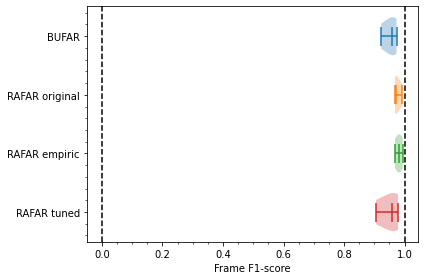

In [30]:
chewbite_utils.my_display_report(report_df)

## Clasificación


================ RUMIA ================



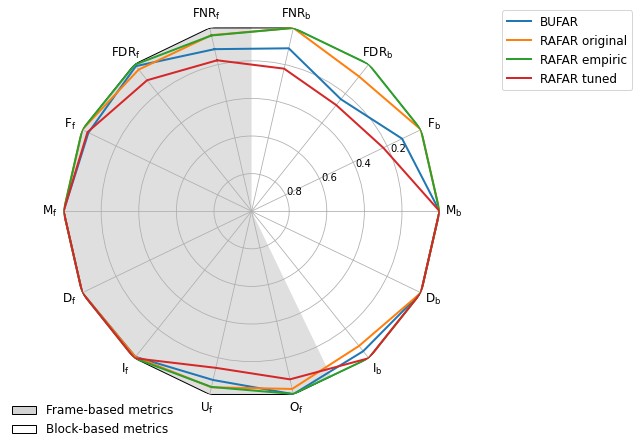

Mean duration used to normalize the violinplot top axis: 144.74 min



/home/sebastian/.virtualenvs/signals-chewbite-web/lib/python3.7/site-packages/armetrics/plotter.py:159: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["%.0f%%" % (100.0 * d / ground_mean_in_minutes) for d in ax1.get_xticks()])


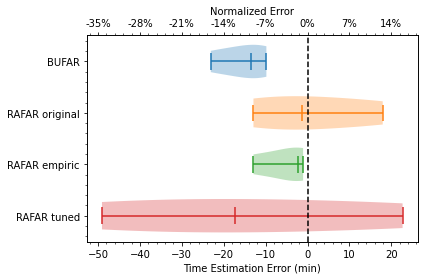

Predictor                Frame-based f1score      Block-based f1score
BUFAR                    0.933 (+-0.027)          0.800 (+-0.346)
RAFAR original           0.961 (+-0.022)          0.952 (+-0.082)
RAFAR empiric            0.977 (+-0.020)          1.000 (+-0.000)
RAFAR tuned              0.847 (+-0.080)          0.741 (+-0.449)

>>BUFAR errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-13.43 min, 	0.948
	D3Eq4Vc2909_3_etiquetado.txt	-23.08 min, 	0.902
	D4Eq1_Vc2948_002_5550.txt	-9.82 min, 	0.948

>>RAFAR original errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-12.90 min, 	0.954
	D3Eq4Vc2909_3_etiquetado.txt	17.95 min, 	0.943
	D4Eq1_Vc2948_002_5550.txt	-1.32 min, 	0.986

>>RAFAR empiric errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-12.90 min, 	0.954
	D3Eq4Vc2909_3_etiquetado.txt	-1.05 min, 	0.990
	D4Eq1_Vc2948_002_5550.txt	-2.32 min, 	0.988

>>RAFAR tuned errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-17.40 min, 	0.939
	D3Eq4Vc2909_3_etiqueta

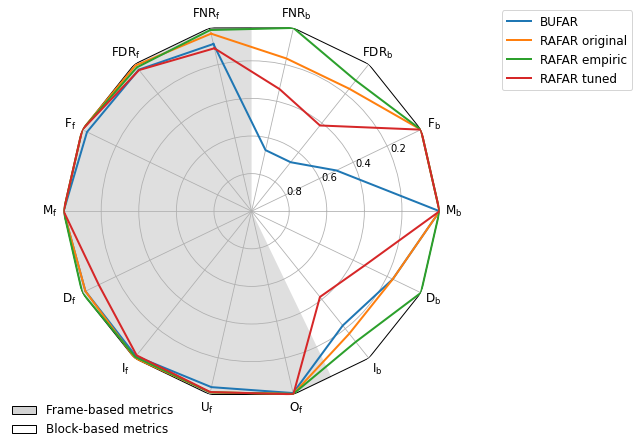

Mean duration used to normalize the violinplot top axis: 126.29 min



/home/sebastian/.virtualenvs/signals-chewbite-web/lib/python3.7/site-packages/armetrics/plotter.py:159: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["%.0f%%" % (100.0 * d / ground_mean_in_minutes) for d in ax1.get_xticks()])


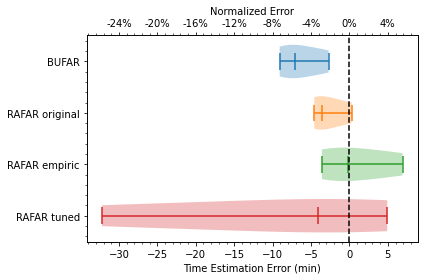

Predictor                Frame-based f1score      Block-based f1score
BUFAR                    0.937 (+-0.032)          1.000 (+-nan)
RAFAR original           0.980 (+-0.020)          0.833 (+-0.289)
RAFAR empiric            0.983 (+-0.013)          0.933 (+-0.115)
RAFAR tuned              0.920 (+-0.063)          0.611 (+-0.347)

>>BUFAR errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-7.08 min, 	0.931
	D3Eq4Vc2909_3_etiquetado.txt	-9.08 min, 	0.909
	D4Eq1_Vc2948_002_5550.txt	-2.72 min, 	0.971

>>RAFAR original errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-3.58 min, 	0.986
	D3Eq4Vc2909_3_etiquetado.txt	-4.58 min, 	0.958
	D4Eq1_Vc2948_002_5550.txt	0.28 min, 	0.996

>>RAFAR empiric errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-3.58 min, 	0.986
	D3Eq4Vc2909_3_etiquetado.txt	6.92 min, 	0.969
	D4Eq1_Vc2948_002_5550.txt	-0.22 min, 	0.995

>>RAFAR tuned errors (in minutes), frame f1-score

	D1Eq4Vc21036_3.txt	-4.08 min, 	0.984
	D3Eq4Vc2909_3_etiquetado.txt	4.

In [32]:
label_of_interest = ["RUMIA", "PASTOREO"]
names_of_predictors = ["BUFAR", "RAFAR original", "RAFAR empiric", "RAFAR tuned"]
predictions_filenames = [bufar_filenames, rafar_original_filenames, rafar_empiric_filenames, rafar_tuned_filenames]

report_csv = "rafarX3_bufar_fafar_activities_report_bq1.csv"
report_df = utils.complete_report(report_csv, label_of_interest, names_of_predictors, chewbite_utils.load_chewbite,
                                  ground_filenames, *predictions_filenames, 
                                  verbose=False)

### Dispersión de F1-score por frame


================ RUMIA ================



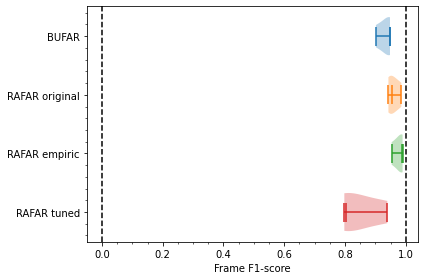


================ PASTOREO ================



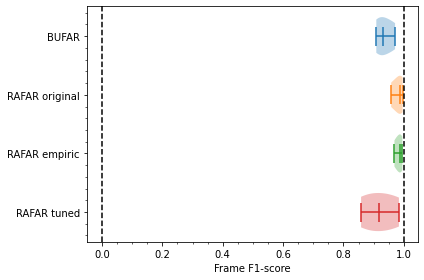

In [33]:
chewbite_utils.my_display_report(report_df)

# Matrices de confusión

Las matrices de confusión se obtuvieron al aproximar la secuencia de etiquetas a una secuencia de frames de tamaño fijo. De esta manera se puede hacer la típica comparación 1 a 1 de cualquier clasificador. Para las comparaciones se consideraron **frames de 1 s**

frames de 1 segundo: prácticamente despreciable en este problema donde se redondean fracciones de segundos, sin alterar significativamente las etiquetas del ground truth o de los predictores




================ BUFAR ================



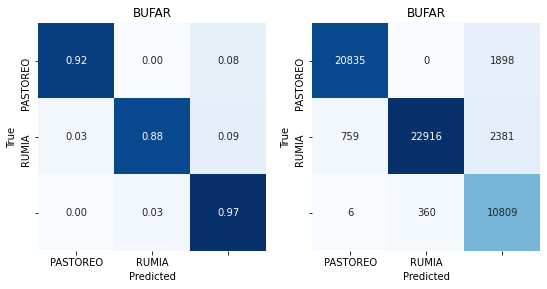


================ RAFAR original ================



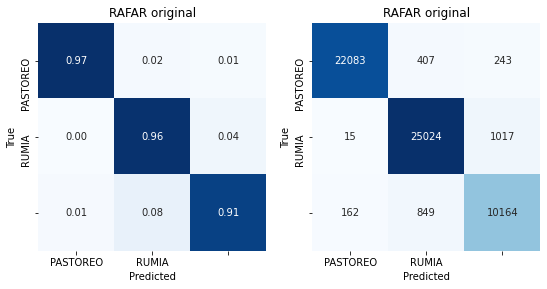


================ RAFAR empiric ================



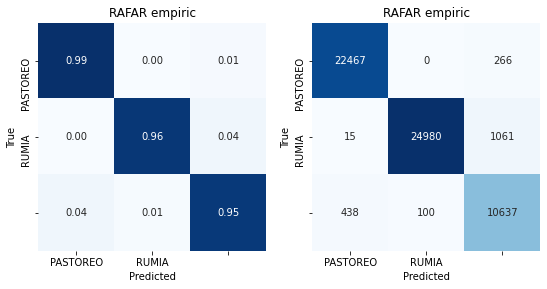


================ RAFAR tuned ================



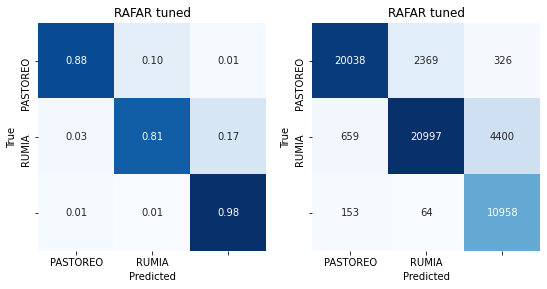

In [34]:
chewbite_utils.plot_predictors_cm(ground_filenames, names_of_predictors, *predictions_filenames,
                                  order=["PASTOREO", "RUMIA", ""]) 

# name_mapper = {"RUMIA": "Rumination", "PASTOREO": "Grazing", "": "Other"}
#                                   name_mapper=name_mapper, order=["Grazing", "Rumination", "Other"])

# F1-score averaged

In [35]:
none_rpfs_df = chewbite_utils.predictors_f1score(ground_filenames, names_of_predictors, *predictions_filenames)
micro_rpfs_df = chewbite_utils.predictors_rpfs(ground_filenames, names_of_predictors, *predictions_filenames, average="micro")  
weighted_rpfs_df = chewbite_utils.predictors_rpfs(ground_filenames, names_of_predictors, *predictions_filenames, average="weighted")  
#, starts_ends=limits)

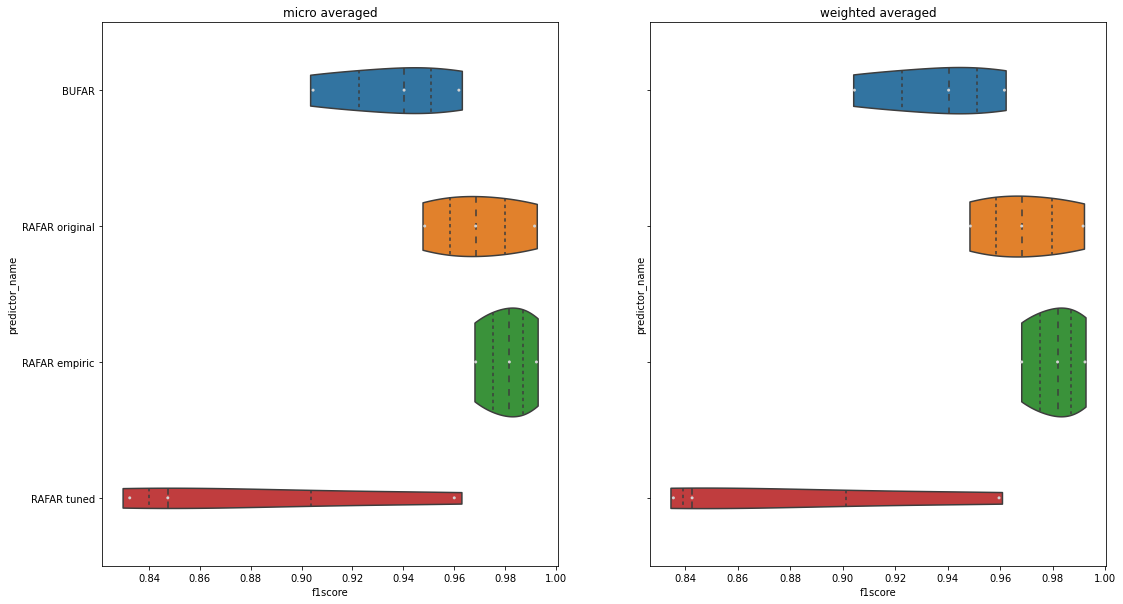

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

sns.violinplot(data=micro_rpfs_df, y="predictor_name", x="f1score", gridsize=50, inner="quartiles", cut=0.05, ax=ax1)
sns.swarmplot(data=micro_rpfs_df, y="predictor_name", x="f1score", ax=ax1, color="lightgrey", size=3);
ax1.set_title("micro averaged")
sns.violinplot(data=weighted_rpfs_df, y="predictor_name", x="f1score", gridsize=50, inner="quartiles", cut=0.02, ax=ax2)
sns.swarmplot(data=weighted_rpfs_df, y="predictor_name", x="f1score", ax=ax2, color="lightgrey", size=3);
ax2.set_title("weighted averaged");

# Precision and recall

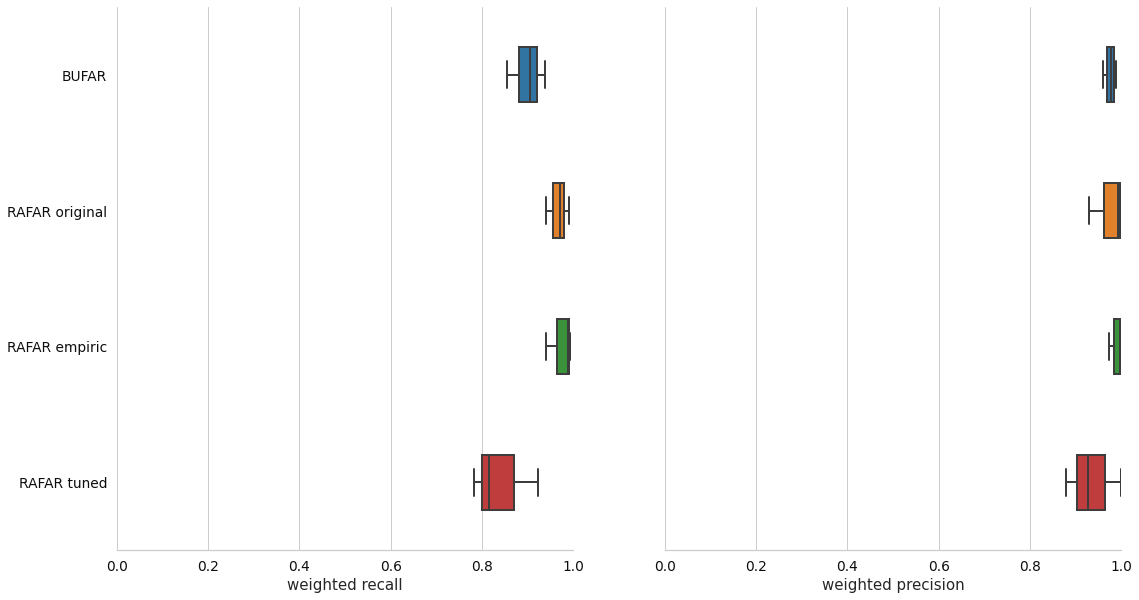

In [37]:
weighted_rpfs_df_filledna = weighted_rpfs_df.fillna(0)

sns.set_style("whitegrid", {'text.labelcolor': '.05', 
                            'xtick.color': '.05',
                            'ytick.color': '.05',})
sns.set_context("notebook", font_scale=1.25)

f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

sns.boxplot(x="recall", y="predictor_name", data=weighted_rpfs_df_filledna, ax=ax1,
            linewidth=2, width=.4, order=names_of_predictors)
ax1.set_xlabel("weighted recall")
ax1.set_ylabel("")
ax1.set_xlim([0, 1])

sns.boxplot(x="precision", y="predictor_name", data=weighted_rpfs_df_filledna, ax=ax2,
            linewidth=2, width=.4, order=names_of_predictors)
ax2.set_ylabel("")
ax2.set_xlabel("weighted precision")
ax2.set_xlim([0, 1])
sns.despine(left=True)

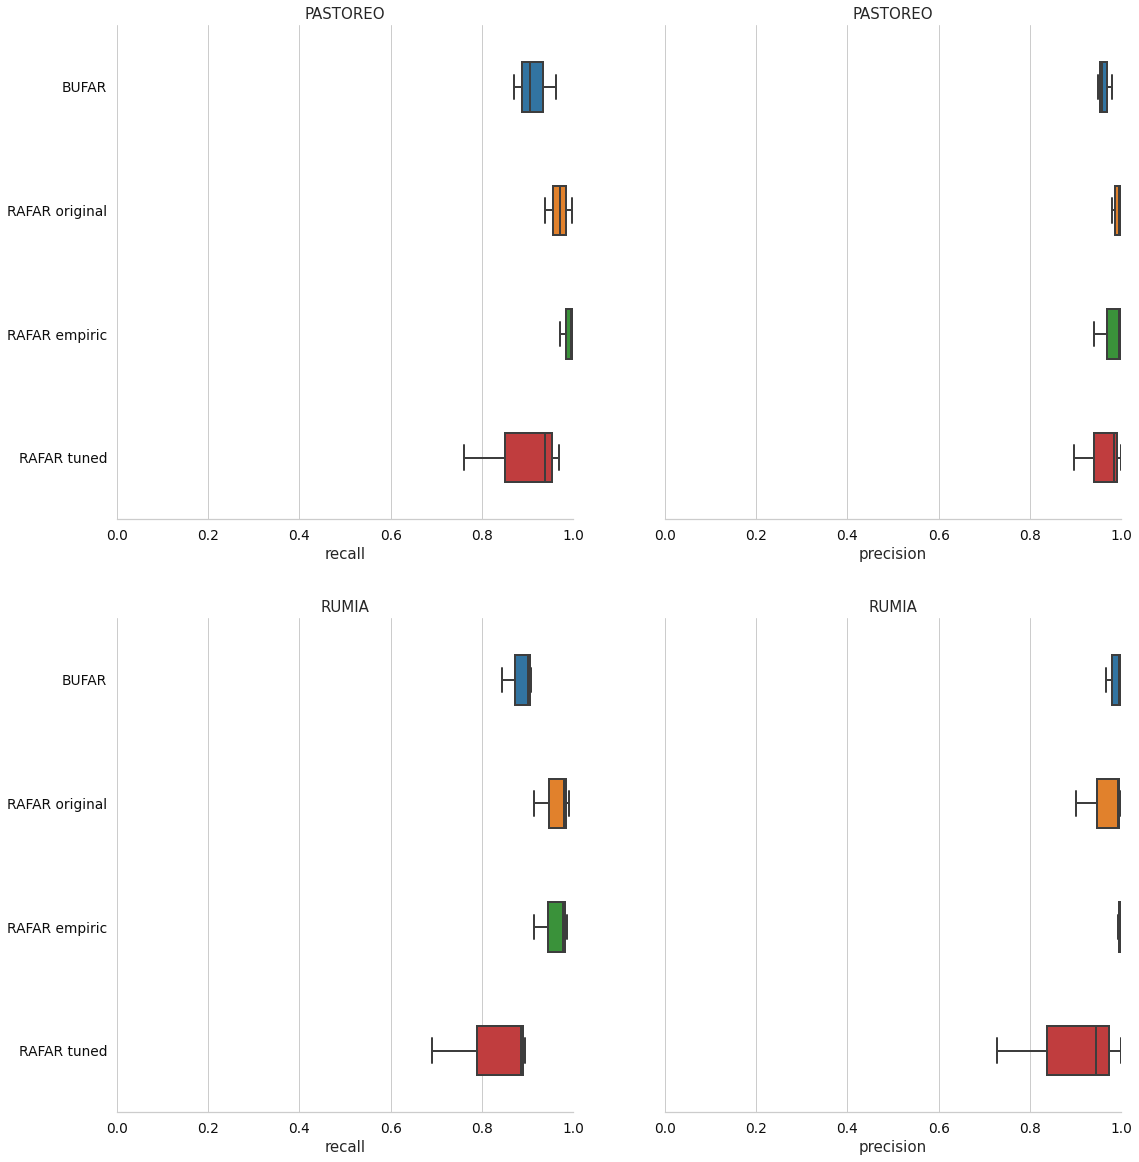

In [38]:
none_rpfs_df_filledna = none_rpfs_df.fillna(0)

sns.set_style("whitegrid", {'text.labelcolor': '.05', 
                            'xtick.color': '.05',
                            'ytick.color': '.05',})
sns.set_context("notebook", font_scale=1.25)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 20), sharey=True)

sns.boxplot(x="recall_PASTOREO", y="predictor_name", data=none_rpfs_df_filledna, ax=ax1,
            linewidth=2, width=.4, order=names_of_predictors)
ax1.set_xlabel("recall")
ax1.set_ylabel(None)
ax1.set_xlim([0, 1])
ax1.set_title("PASTOREO")

sns.boxplot(x="precision_PASTOREO", y="predictor_name", data=none_rpfs_df_filledna, ax=ax2,
            linewidth=2, width=.4, order=names_of_predictors)
ax2.set_ylabel("")
ax2.set_xlabel("precision")
ax2.set_xlim([0, 1])
sns.despine(left=True)
ax2.set_title("PASTOREO")

sns.boxplot(x="recall_RUMIA", y="predictor_name", data=none_rpfs_df_filledna, ax=ax3,
            linewidth=2, width=.4, order=names_of_predictors)
ax3.set_xlabel("recall")
ax3.set_ylabel(None)
ax3.set_xlim([0, 1])
ax3.set_title("RUMIA")

sns.boxplot(x="precision_RUMIA", y="predictor_name", data=none_rpfs_df_filledna, ax=ax4,
            linewidth=2, width=.4, order=names_of_predictors)
ax4.set_ylabel("")
ax4.set_xlabel("precision")
ax4.set_xlim([0, 1])
sns.despine(left=True)
ax4.set_title("RUMIA");

# Hamming loss

In [39]:
df_hamming = chewbite_utils.predictors_hamming_loss(ground_filenames, names_of_predictors, *predictions_filenames) #, starts_ends=limits)

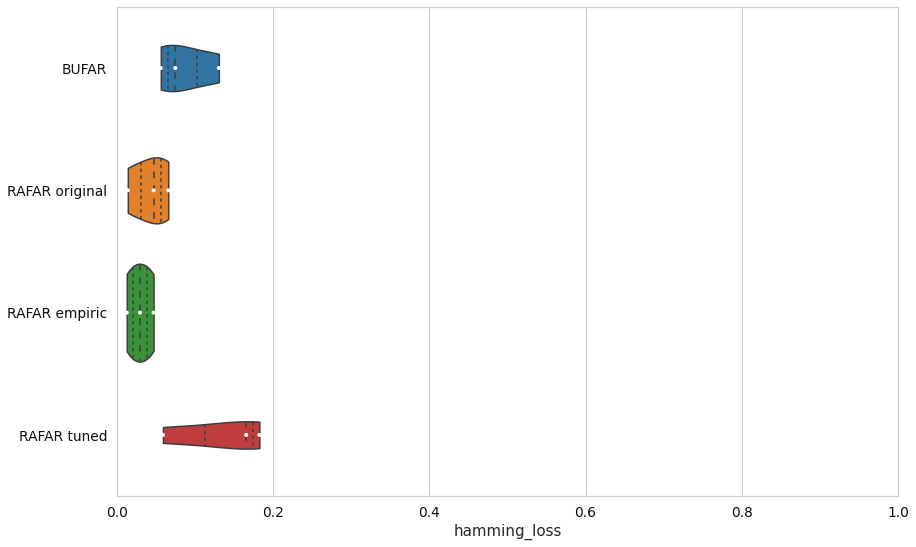

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,9))

sns.violinplot(data=df_hamming, y="predictor_name", x="hamming_loss", gridsize=50, cut=0, inner="quarter")
sns.swarmplot(data=df_hamming, y="predictor_name", x="hamming_loss", color="w", size=4);
plt.gca().set_xlim([0, 1]);
plt.gca().set_ylabel(None);

# F1score, precision y recall por archivo

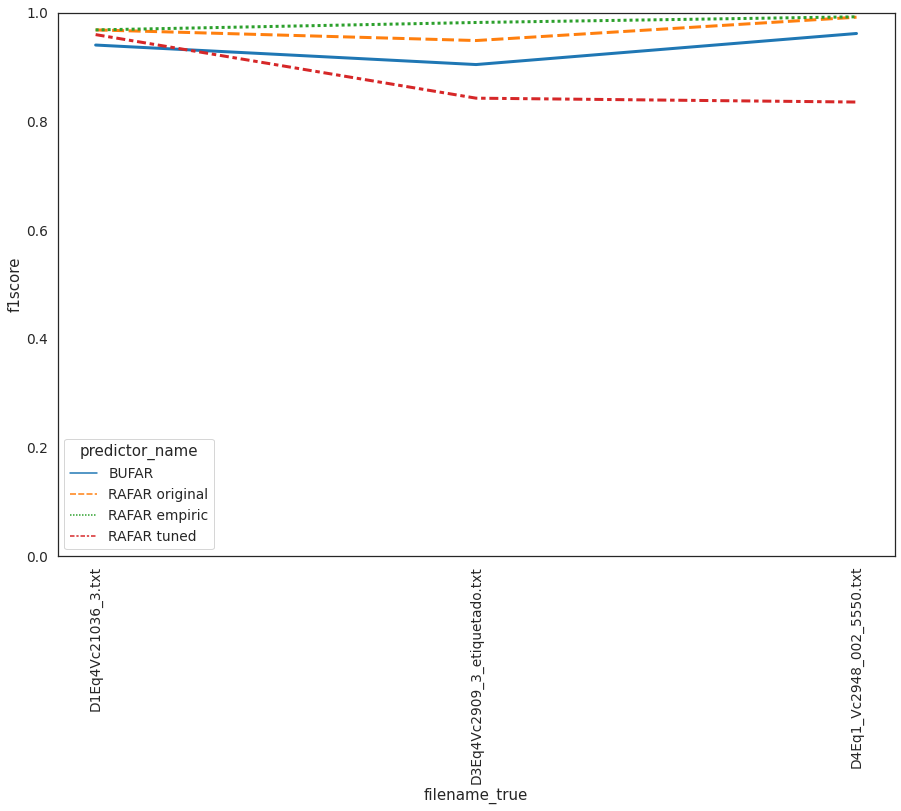

In [41]:
sns.set_style("white")

f = plt.figure(figsize=(15, 10))
ax = f.gca()

sns.lineplot(data=weighted_rpfs_df_filledna, y="f1score", x="filename_true", hue="predictor_name", style="predictor_name", linewidth=3)
plt.xticks(rotation=90);
ax.set_ylim([0, 1]);

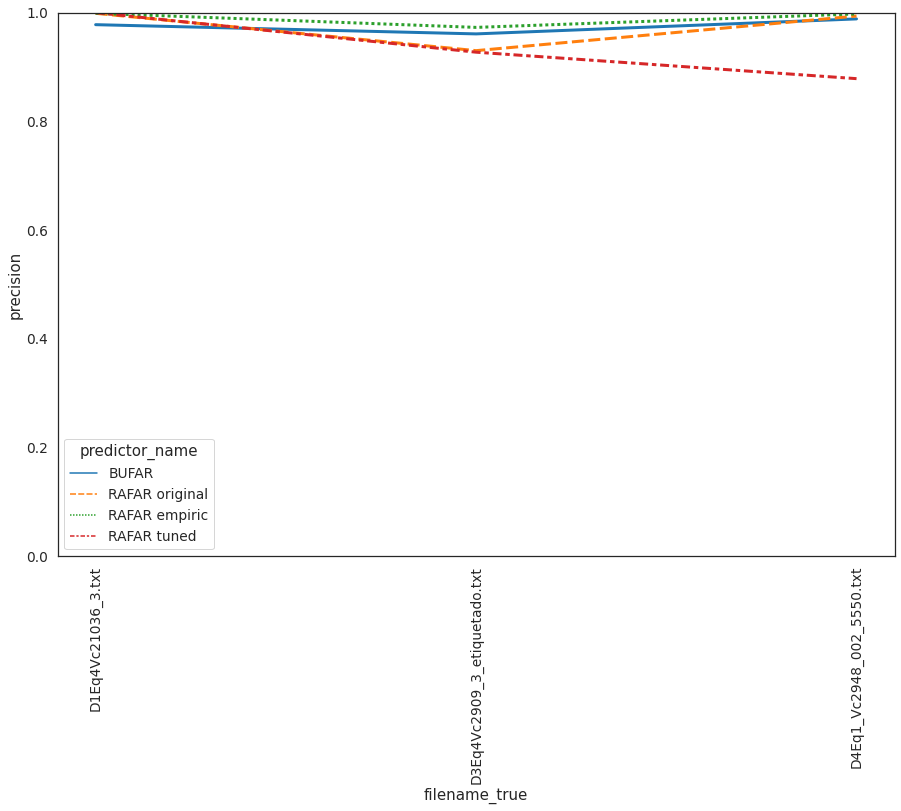

In [42]:
f = plt.figure(figsize=(15, 10))
ax = f.gca()

sns.lineplot(data=weighted_rpfs_df_filledna, y="precision", x="filename_true", hue="predictor_name", style="predictor_name", linewidth=3)
plt.xticks(rotation=90);
ax.set_ylim([0, 1]);

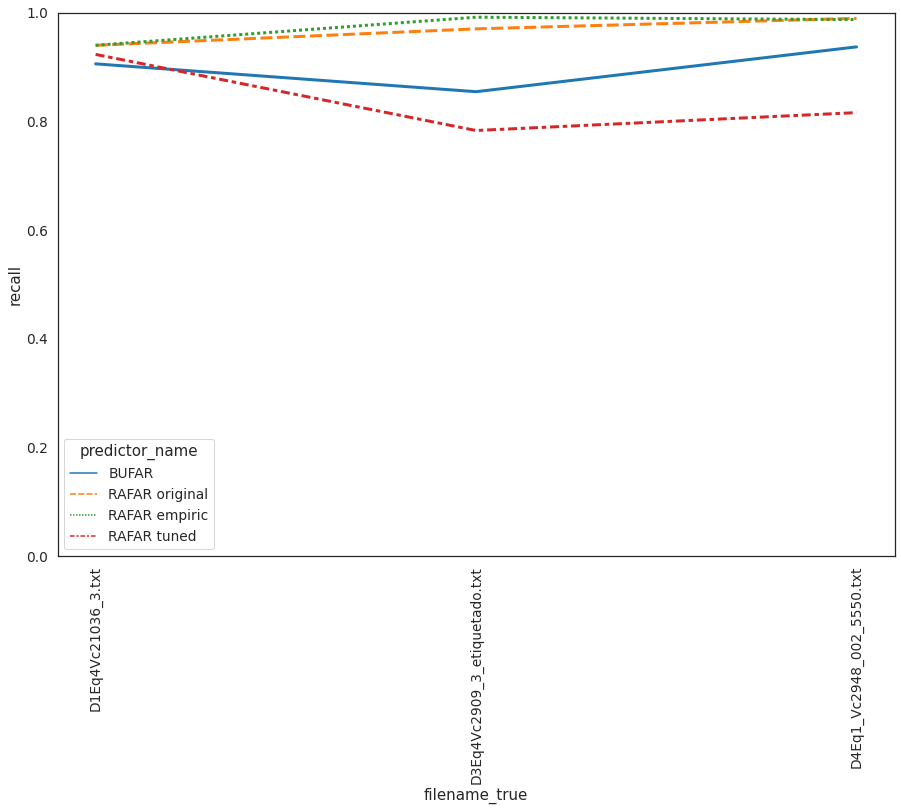

In [43]:
f = plt.figure(figsize=(15, 10))
ax = f.gca()

sns.lineplot(data=weighted_rpfs_df_filledna, y="recall", x="filename_true", hue="predictor_name", style="predictor_name", linewidth=3)
plt.xticks(rotation=90);
ax.set_ylim([0, 1]);